In [2]:
# Python setup
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import torch.nn as nn
#import data functions and constants (no caps for easier typing)
import modelingfunctions.dataprocessing as d
import modelingfunctions.modeling as m
import modelingfunctions.utilities as u

In [3]:
num_targets = 50
epochs = 50
batch_size = 64

## Generalization Methods
Here, we see that using dropout gives the highest accuracy, but the widest gap between train and val loss. We also see the accuracy tailing off in a bit of a logarithmic scale. On the other hand, batch normalization provides less difference between train and val. We also see a continuously increasing accuracy, even with a lower train loss. This tells us that with more training, the model using batch normalization will likely see the greatest increase in accuracy. 

## No generalization

Using no generalization
Gathering configurations
Configuration: 0:00:36.426144
Epoch: 1
Train_loss: 3.9419250297546387, Val loss: 3.84411638433283, Test Accuracy: 0.022727272727272728
Epoch: 2
Train_loss: 3.7260832023620605, Val loss: 3.813025019385598, Test Accuracy: 0.045454545454545456
Epoch: 3
Train_loss: 3.630281047821045, Val loss: 3.7436452345414595, Test Accuracy: 0.045454545454545456
Epoch: 4
Train_loss: 3.487200574874878, Val loss: 3.660355632955378, Test Accuracy: 0.10227272727272728
Epoch: 5
Train_loss: 3.375631971359253, Val loss: 3.6187849044799805, Test Accuracy: 0.06818181818181818
Epoch: 6
Train_loss: 3.2202558803558348, Val loss: 3.551738067106767, Test Accuracy: 0.10227272727272728
Epoch: 7
Train_loss: 3.0749686050415037, Val loss: 3.4641366438432173, Test Accuracy: 0.17045454545454544
Epoch: 8
Train_loss: 2.922995777130127, Val loss: 3.393611127679998, Test Accuracy: 0.22727272727272727
Epoch: 9
Train_loss: 2.7934161949157716, Val loss: 3.3360373973846436, Test Accu

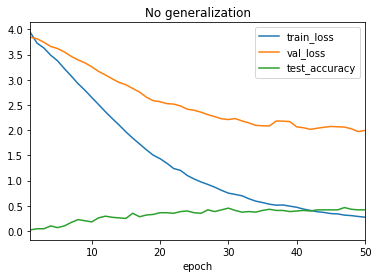

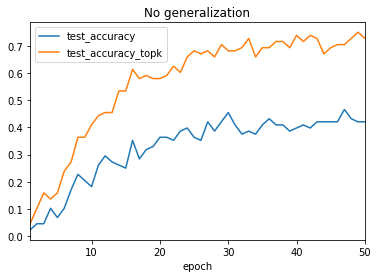

In [8]:
dataloaders = d.get_target_dataloader(d.basic_data, num_targets=num_targets,
                                      batch_size=batch_size)
model = m.get_model(num_targets, generalization='none', layers='34')
optimizer = m.get_adam_optimizer(model)
criterion = nn.CrossEntropyLoss()

results = m.train_model(dataloaders=dataloaders, model=model, criterion=criterion,  topk=3,
                        name="No generalization", optimizer=optimizer, epochs=epochs, 
                        clear_cuda_cache=True, print_epoch=True)
print(results['model_run_time'])
u.plot_results(results)
u.plot_accuracy(results)

## Batch Normalization

Using batch normalization for generalization
Gathering configurations
Configuration: 0:00:35.719584
Epoch: 1
Train_loss: 4.054032545089722, Val loss: 3.876095273277976, Test Accuracy: 0.011363636363636364
Epoch: 2
Train_loss: 3.837507152557373, Val loss: 3.852041482925415, Test Accuracy: 0.045454545454545456
Epoch: 3
Train_loss: 3.778098611831665, Val loss: 3.827773852781816, Test Accuracy: 0.056818181818181816
Epoch: 4
Train_loss: 3.7231091117858885, Val loss: 3.8060409155758945, Test Accuracy: 0.056818181818181816
Epoch: 5
Train_loss: 3.675241928100586, Val loss: 3.785642992366444, Test Accuracy: 0.06818181818181818
Epoch: 6
Train_loss: 3.626349477767944, Val loss: 3.765161535956643, Test Accuracy: 0.07954545454545454
Epoch: 7
Train_loss: 3.582701463699341, Val loss: 3.7465357130224053, Test Accuracy: 0.07954545454545454
Epoch: 8
Train_loss: 3.520425405502319, Val loss: 3.7269363186576148, Test Accuracy: 0.06818181818181818
Epoch: 9
Train_loss: 3.4711035919189452, Val loss: 3.6853609

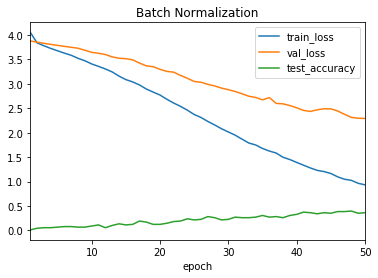

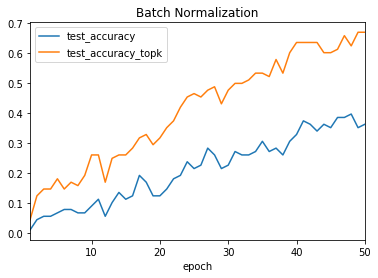

In [9]:
dataloaders = d.get_target_dataloader(d.basic_data, num_targets=num_targets,
                                      batch_size=batch_size)
model = m.get_model(num_targets, generalization='batchnorm', layers='34')
optimizer = m.get_adam_optimizer(model)
criterion = nn.CrossEntropyLoss()

results = m.train_model(dataloaders=dataloaders, model=model, criterion=criterion,  topk=3,
                        name="Batch Normalization", optimizer=optimizer, epochs=epochs, 
                        clear_cuda_cache=True, print_epoch=True)
print(results['model_run_time'])
u.plot_results(results)
u.plot_accuracy(results)

## Basic data, complex transforms, dropout 0.2

Using dropout for generalization: dropout=0.2
Gathering configurations
Configuration: 0:00:34.631932
Epoch: 1
Train_loss: 3.9377033805847166, Val loss: 3.875065738504583, Test Accuracy: 0.07954545454545454
Epoch: 2
Train_loss: 3.749337978363037, Val loss: 3.833226052197543, Test Accuracy: 0.03409090909090909
Epoch: 3
Train_loss: 3.629000539779663, Val loss: 3.7653884237462822, Test Accuracy: 0.056818181818181816
Epoch: 4
Train_loss: 3.505700273513794, Val loss: 3.7066194360906426, Test Accuracy: 0.10227272727272728
Epoch: 5
Train_loss: 3.381115074157715, Val loss: 3.6420379985462534, Test Accuracy: 0.045454545454545456
Epoch: 6
Train_loss: 3.2244003200531006, Val loss: 3.5518710613250732, Test Accuracy: 0.125
Epoch: 7
Train_loss: 3.0878122234344483, Val loss: 3.470864621075717, Test Accuracy: 0.17045454545454544
Epoch: 8
Train_loss: 2.9241549015045165, Val loss: 3.3596866564317183, Test Accuracy: 0.2840909090909091
Epoch: 9
Train_loss: 2.7782152557373045, Val loss: 3.293250495737249, T

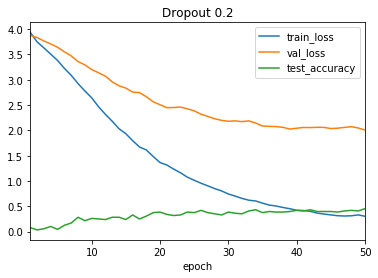

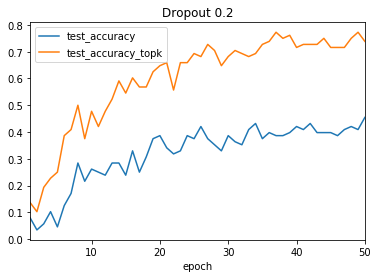

In [10]:
dataloaders = d.get_target_dataloader(d.basic_data, num_targets=num_targets,
                                      batch_size=batch_size)
model = m.get_model(num_targets, generalization='dropout', dropout=0.2, layers='34')
optimizer = m.get_adam_optimizer(model)
criterion = nn.CrossEntropyLoss()

results = m.train_model(dataloaders=dataloaders, model=model, criterion=criterion,  topk=3,
                        name="Dropout 0.2", optimizer=optimizer, epochs=epochs, 
                        clear_cuda_cache=True, print_epoch=True)
print(results['model_run_time'])
u.plot_results(results)
u.plot_accuracy(results)

## Basic data, complex transforms, dropout 0.4

Using dropout for generalization: dropout=0.4
Gathering configurations
Configuration: 0:00:24.030320
Epoch: 1
Train_loss: 4.005556182861328, Val loss: 3.8512014909224077, Test Accuracy: 0.056818181818181816
Epoch: 2
Train_loss: 3.778852424621582, Val loss: 3.809968016364358, Test Accuracy: 0.10227272727272728
Epoch: 3
Train_loss: 3.664513988494873, Val loss: 3.765428889881481, Test Accuracy: 0.056818181818181816
Epoch: 4
Train_loss: 3.5543472003936767, Val loss: 3.7239709333939985, Test Accuracy: 0.07954545454545454
Epoch: 5
Train_loss: 3.4466567993164063, Val loss: 3.681894454089078, Test Accuracy: 0.056818181818181816
Epoch: 6
Train_loss: 3.3124197006225584, Val loss: 3.6065438877452505, Test Accuracy: 0.07954545454545454
Epoch: 7
Train_loss: 3.1587996292114258, Val loss: 3.5201715989546343, Test Accuracy: 0.17045454545454544
Epoch: 8
Train_loss: 2.9996219158172606, Val loss: 3.418145331469449, Test Accuracy: 0.14772727272727273
Epoch: 9
Train_loss: 2.852378959655762, Val loss: 3.343

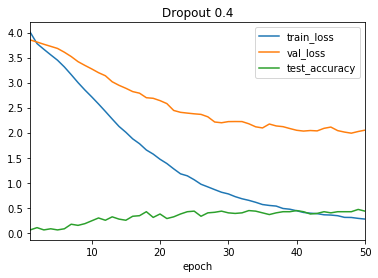

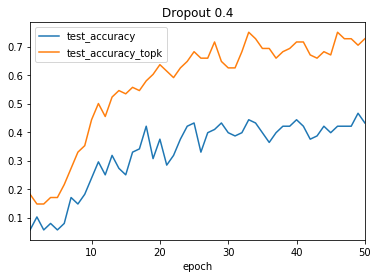

In [11]:
dataloaders = d.get_target_dataloader(d.basic_data, num_targets=num_targets,
                                      batch_size=batch_size)
model = m.get_model(num_targets, generalization='dropout', dropout=0.4, layers='34')
optimizer = m.get_adam_optimizer(model)
criterion = nn.CrossEntropyLoss()

results = m.train_model(dataloaders=dataloaders, model=model, criterion=criterion,  topk=3,
                        name="Dropout 0.4", optimizer=optimizer, epochs=epochs, 
                        clear_cuda_cache=True, print_epoch=True)
print(results['model_run_time'])
u.plot_results(results)
u.plot_accuracy(results)